# 概率的基本概念
## 为什么需要概率
简单地说，机器学习就是做出预测。
1. 根据**病人的临床病史**，我们可能想预测他们在下一年心脏病发作的概率。 
2. 在**飞机喷气发动机的异常检测**中，我们想要评估一组发动机读数为正常运行情况的概率有多大。 
3. 在**强化学习中**，我们希望智能体（$agent$）能在一个环境中智能地行动。 这意味着我们需要考虑在每种可行的行为下获得高奖励的概率。 
4. 当我们**建立推荐系统**时，我们也需要考虑概率。 例如，假设我们为一家大型在线书店工作，我们可能希望估计某些用户购买特定图书的概率。 为此，我们需要使用概率学。
例如，以下代码模拟了投掷1000次骰子的实验结果

In [1]:
import torch
prbvec = torch.ones(6)/6  # 这是掷骰子的概率，每个面朝上的概率相同
prbvec

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [4]:
# 下面进行随机采样
from torch.distributions import multinomial
multinomial.Multinomial(1, prbvec).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [6]:
# 随机采样100次
smp1000 = multinomial.Multinomial(1000, prbvec).sample()
smp1000/1000 # 频率依概率收敛

tensor([0.1700, 0.1580, 0.1510, 0.1880, 0.1570, 0.1760])

## 概率基本概念
&emsp;&emsp;在处理骰子掷出时，我们将集合S={1, 2, 3, 4, 5, 5}称为***样本空间sample space***或***结果空间outcome space***， 其中每个元素都是***结果outcome***。 ***事件event***是一组给定样本空间的随机结果。 例如，“看到5”和“看到奇数”都是掷出骰子的有效事件。 注意，如果一个随机实验的结果在中，则事件已经发生。 也就是说，如果投掷出点3，因为3是奇数，我们可以说，“看到奇数”的事件发生了。
&emsp;&emsp;***概率probability***可以被认为是将集合映射到真实值的函数。
&emsp;&emsp;在我们掷骰子的随机实验中，我们引入了***随机变量random variable***的概念。 随机变量几乎可以是任何数量，并且它可以在随机实验的一组可能性中取一个值。请注意，离散（discrete）随机变量（如骰子的每一面） 和***连续（continuous）随机变量***（如人的体重和身高）之间存在微妙的区别。在这样的情况下，我们将这个看到某个数值的可能性量化为***密度density***。 高度恰好为1.80米的概率为0，但密度不是0。 在任何两个不同高度之间的区间，我们都有非零的概率。 

---
联合概率（joint probability）
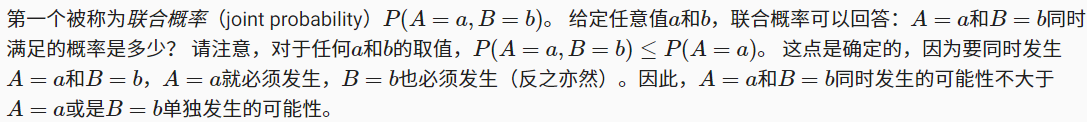
条件概率（conditional probability）
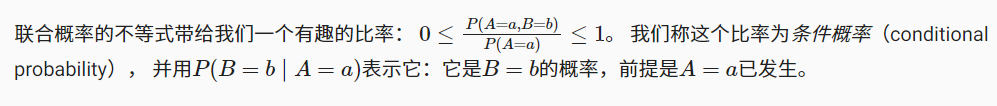
贝叶斯定理（Bayes’ theorem）
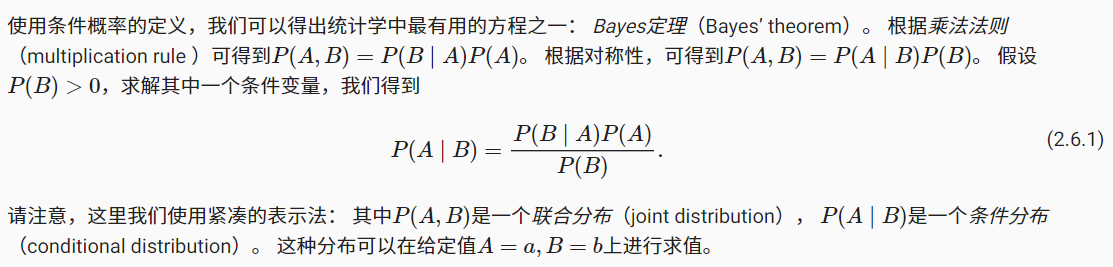
边缘分布（marginal distribution）
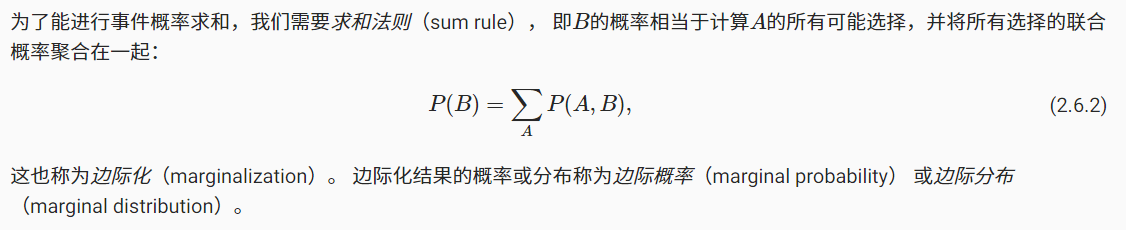



# 查看api
通过dir()查看类包含的函数，通过help()获得函数的帮助，即函数接口定义，功能解释，返回值含义

In [7]:
dir(multinomial)

['Binomial',
 'Categorical',
 'Distribution',
 'Multinomial',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'broadcast_all',
 'constraints',
 'inf',
 'torch']

In [9]:
help(multinomial.Multinomial)

Help on class Multinomial in module torch.distributions.multinomial:

class Multinomial(torch.distributions.distribution.Distribution)
 |  Multinomial(total_count=1, probs=None, logits=None, validate_args=None)
 |  
 |  Creates a Multinomial distribution parameterized by :attr:`total_count` and
 |  either :attr:`probs` or :attr:`logits` (but not both). The innermost dimension of
 |  :attr:`probs` indexes over categories. All other dimensions index over batches.
 |  
 |  Note that :attr:`total_count` need not be specified if only :meth:`log_prob` is
 |  called (see example below)
 |  
 |  .. note:: The `probs` argument must be non-negative, finite and have a non-zero sum,
 |            and it will be normalized to sum to 1 along the last dimension. :attr:`probs`
 |            will return this normalized value.
 |            The `logits` argument will be interpreted as unnormalized log probabilities
 |            and can therefore be any real number. It will likewise be normalized so tha